In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Utils 

In [ ]:
import pandas as pd
def load (path):  
  df = pd.read_csv(path)    
  return df 

In [ ]:
def features_type (df) : 
  numerical = df.dtypes[df.dtypes != "object"].index
  non_num = []
  for x in  list(df.columns) : 
      if x not in numerical : 
          non_num.append(x)
  return numerical , non_num

Process

In [ ]:
import random
def match_players (df) : 
  Matches = []
  Player_side1 = []
  Player_side2 = []
  for idx , row in df.iterrows() : 
    if random.uniform(0, 1) <= 0.5 : 
      Matches.append(row['winner_name'] + ' vs ' + row['loser_name'] ) 
      Player_side1.append(row['winner_name'])
      Player_side2.append(row['loser_name'])
    else : 
      Matches.append(row['loser_name'] + ' vs ' + row['winner_name'] ) 
      Player_side1.append(row['loser_name'])
      Player_side2.append(row['winner_name'])
  return Matches, Player_side1 , Player_side2

In [ ]:
def information_extractor (df) : 
  informations = []
  for idx , row in df.iterrows() : 
    d = {} 
    d['player_name'] = row['winner_name']
    d['hand'] = row['winner_hand'] 
    d['height'] = row['winner_ht']
    d['country'] = row['winner_ioc']
    d['age'] = row['winner_age']
    d['rank'] = row['winner_rank']
    d['points'] = row['winner_rank_points']
    Exist = False 
    for x in informations : 
      if x['player_name'] == d['player_name'] : 
        Exist = True 
    if not Exist : 
      informations.append(d)
    
    d = {} 
    d['player_name'] = row['loser_name']
    d['hand'] = row['loser_hand'] 
    d['height'] = row['loser_ht']
    d['country'] = row['loser_ioc']
    d['age'] = row['loser_age']
    d['rank'] = row['loser_rank']
    d['points'] = row['loser_rank_points']
    Exist = False 
    for x in informations : 
      if x['player_name'] == d['player_name'] : 
        Exist = True 
    if not Exist : 
      informations.append(d)
  return  informations

In [ ]:
def information_features (df) : 
  PS1_age = []
  PS1_country = []
  PS1_hand = []
  PS1_height = []
  PS1_points = []
  PS1_rank = []
  PS2_age = []
  PS2_country = []
  PS2_hand = []
  PS2_height = []
  PS2_points = []
  PS2_rank = []
  from tqdm import tqdm
  for idx,row in tqdm(df.iterrows()) : 
    PS1_info = False 
    i = 0 
    while ((not PS1_info) and (i < len(informations))) : 
      if informations[i]['player_name'] == row ['Player_Side1'] : 
        PS1_info = True 
        PS1_age.append(informations[i]['age']) 
        PS1_country.append(informations[i]['country']) 
        PS1_hand.append(informations[i]['hand']) 
        PS1_height.append(informations[i]['height']) 
        PS1_points.append(informations[i]['points']) 
        PS1_rank.append(informations[i]['rank']) 
      i = i + 1 

    PS2_info = False 
    i = 0 
    while ((not PS2_info) and (i < len(informations))) : 
      if informations[i]['player_name'] == row ['Player_Side2'] : 
        PS1_info = True 
        PS2_age.append(informations[i]['age']) 
        PS2_country.append(informations[i]['country']) 
        PS2_hand.append(informations[i]['hand']) 
        PS2_height.append(informations[i]['height']) 
        PS2_points.append(informations[i]['points']) 
        PS2_rank.append(informations[i]['rank']) 
      i = i + 1 
  return PS1_age ,PS1_country ,PS1_hand ,PS1_height ,PS1_points ,PS1_rank ,PS2_age ,PS2_country ,PS2_hand ,PS2_height ,PS2_points ,PS2_rank 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def missing_values(df): 
  total = df.isnull().sum().sort_values(ascending=False)


  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  f, ax = plt.subplots(figsize=(15, 6))
  plt.xticks(rotation='90')
  sns.barplot(x=missing_data.index, y=missing_data['Percent'])
  plt.xlabel('Features', fontsize=15)
  plt.ylabel('Percent of Missing Values', fontsize=15)
  plt.title('Percentage of Missing Data by Feature', fontsize=15)
  # missing_data.head()
  return (missing_data)

In [ ]:
def Random_sampling(df, variable):
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0) 
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable] = random_sample

In [ ]:
def prepare_target (df) :
  target = [] 
  for idx , row in df.iterrows () : 
    if row['winner_name'] == row['Player_Side1']  : 
      target.append(1)
    else : 
      target.append(2)
  return target


Main

In [ ]:
Useful_columns = ['tourney_name',
 'surface',
 'draw_size',
 'tourney_level',
 'tourney_date',
 'match_num',
 'best_of' , 'round','Match', 'Player_Side1' , 'Player_Side2',
 'PS1_age',
'PS1_country',
'PS1_hand',
'PS1_height',
'PS1_points',
'PS1_rank',
'PS2_age',
'PS2_country',
'PS2_hand',
'PS2_height',
'PS2_points',
'PS2_rank'] 

1462it [00:02, 489.08it/s]


['PS2_height', 'PS1_height', 'PS2_rank', 'PS2_points', 'PS1_rank', 'PS1_points', 'PS1_age', 'PS2_hand', 'PS2_age', 'PS1_hand']


1848it [00:03, 533.15it/s]


['PS2_height', 'PS1_height', 'PS2_rank', 'PS2_points', 'PS1_rank', 'PS1_points']


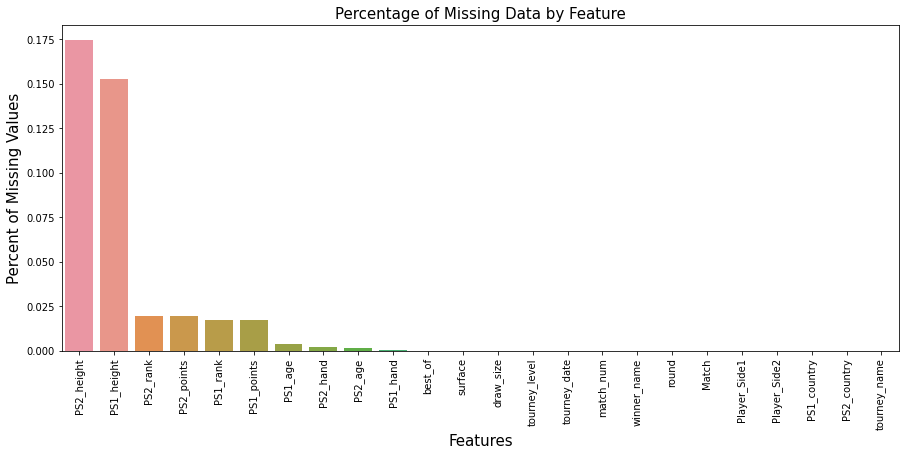

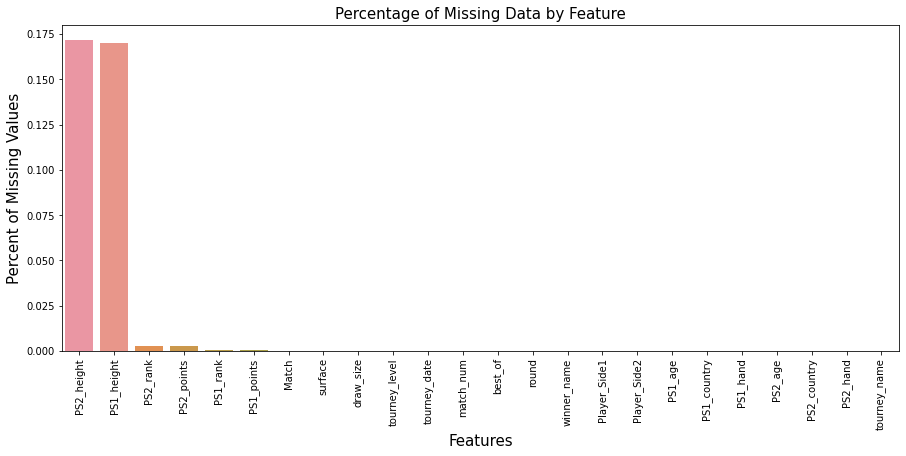

In [ ]:
df1 = pd.DataFrame([], columns=Useful_columns)
for i in range (2020,2022):
  df = load('/content/drive/MyDrive/tennis_atp-master.zip (Unzipped Files)/tennis_atp-master/atp_matches_{}.csv'.format(i))
  Matches, Player_side1 , Player_side2 = match_players (df)
  df['Match'] = Matches
  df['Player_Side1'] = Player_side1
  df['Player_Side2'] = Player_side2
  informations = information_extractor(df)
  mid_columns = ['tourney_name',
 'surface',
 'draw_size',
 'tourney_level',
 'tourney_date',
 'match_num',
 'best_of' , 'round','Match', 'Player_Side1' , 'Player_Side2','winner_name']
  df = df[mid_columns]
  PS1_age ,PS1_country ,PS1_hand ,PS1_height ,PS1_points ,PS1_rank ,PS2_age ,PS2_country ,PS2_hand ,PS2_height ,PS2_points ,PS2_rank  = information_features (df) 
  df['PS1_age']  = PS1_age
  df['PS1_country'] = PS1_country
  df['PS1_hand'] = PS1_hand
  df['PS1_height'] = PS1_height
  df['PS1_points'] = PS1_points
  df['PS1_rank'] = PS1_rank
  df['PS2_age'] = PS2_age
  df['PS2_country'] = PS2_country
  df['PS2_hand'] = PS2_hand
  df['PS2_height'] = PS2_height
  df['PS2_points'] = PS2_points
  df['PS2_rank'] = PS2_rank
  missing_data = missing_values(df)
  nans = [ idx  for idx,row in missing_data.iterrows()  if (row['Percent'] != 0) ]
  print(nans)
  for column in nans : 
    Random_sampling(df,column)
  target = prepare_target(df)
  df.drop('winner_name',axis=1,inplace=True)
  df['winner'] = target
  df1 = pd.concat([df1,df])

In [ ]:
df1.to_csv('Tennis.csv')

Saving

In [ ]:
# df.to_csv('Tennis.csv')

In [ ]:
# df = load('/content/drive/MyDrive/Tennis.csv')

In [ ]:
# df.drop('Unnamed: 0' , axis= 1 ,inplace=True) 

Splitting 

In [ ]:
df1.shape

(3310, 24)

In [ ]:
def splitting_data (df) : 
  df = df.sample(frac=1).reset_index(drop=True)
  train,test = df[:2700] , df[2700:]
  return train,test


In [ ]:
train,test = splitting_data (df1)

In [ ]:
test.shape

(610, 24)

Model

In [ ]:
_ , non_num = features_type (df1.drop('winner',axis=1)) 

In [ ]:
# non_num.pop(2)
# non_num.pop(3)
# non_num.pop(3)

In [ ]:
non_num

['tourney_name',
 'surface',
 'draw_size',
 'tourney_level',
 'tourney_date',
 'match_num',
 'best_of',
 'round',
 'Match',
 'Player_Side1',
 'Player_Side2',
 'PS1_country',
 'PS1_hand',
 'PS2_country',
 'PS2_hand']

In [ ]:

class CFG_Catboost :
  SEED = 42
  n_splits = 5
  
  catboost_params = {'learning_rate':0.15,'iterations':10000,'eval_metric':'Accuracy',
                      'use_best_model' :True,'verbose':100,'random_seed': 0,'max_depth':7}
  remove_features = ['winner']
  categ_features = non_num
  TARGET_COL = 'winner'

In [ ]:
def features_utils (train):
  features_columns = [col for col in train.columns if col not in CFG_Catboost.remove_features]
  return features_columns

In [ ]:
features_columns = features_utils (train)

In [ ]:
def divide_train (train):
  skf = StratifiedKFold(n_splits=CFG_Catboost.n_splits,shuffle=True, random_state=CFG_Catboost.SEED)
  X , y   = train[features_columns] , train[CFG_Catboost.TARGET_COL]
  return X,y,skf

In [ ]:
from sklearn.model_selection import StratifiedKFold
X,y,skf= divide_train (train)

In [ ]:
def StratifiedKFold_Train(X,y):
  # oof_cat = np.zeros((train.shape[0],))
  test['target'] = 0
  cat_preds= []
  for fold_, (trn_idx, val_idx) in enumerate(skf.split(X,y)):
      print(50*'-')
      print('Fold:',fold_+1)
      X_train, y_train = X.iloc[trn_idx,:], y[trn_idx] 
      X_test, y_test = X.iloc[val_idx,:], y[val_idx] 
        
      estimator = CatBoostClassifier(**CFG_Catboost.catboost_params)
      estimator.fit(Pool(X_train,y_train,cat_features = CFG_Catboost.categ_features),
                    eval_set = Pool(X_test,y_test,cat_features = CFG_Catboost.categ_features),
                    early_stopping_rounds=200)
  
      y_pred_test = estimator.predict(test[features_columns])
      cat_preds.append(y_pred_test)
      print(50*'-')
      print()
  catboost_preds = np.mean(cat_preds,axis=0)
  return catboost_preds


In [ ]:
# !pip install catboost==0.22 --quiet


In [ ]:
from catboost import CatBoostClassifier ,Pool
import numpy as np
catboost_preds = StratifiedKFold_Train(X,y)

--------------------------------------------------
Fold: 1
0:	learn: 0.6148148	test: 0.5870370	best: 0.5870370 (0)	total: 27.8ms	remaining: 4m 37s
100:	learn: 0.9388889	test: 0.7537037	best: 0.7666667 (88)	total: 2.57s	remaining: 4m 11s
200:	learn: 0.9939815	test: 0.7555556	best: 0.7666667 (88)	total: 5.13s	remaining: 4m 10s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7666666667
bestIteration = 88

Shrink model to first 89 iterations.
--------------------------------------------------

--------------------------------------------------
Fold: 2
0:	learn: 0.6296296	test: 0.5888889	best: 0.5888889 (0)	total: 25.4ms	remaining: 4m 14s
100:	learn: 0.9375000	test: 0.7259259	best: 0.7481481 (59)	total: 2.46s	remaining: 4m 1s
200:	learn: 0.9916667	test: 0.7296296	best: 0.7481481 (59)	total: 4.96s	remaining: 4m 1s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7481481481
bestIteration = 59

Shrink model to first 60 iterations.
----------------------

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(catboost_preds.astype('int64'),test.winner)

0.7262295081967213